<a href="https://colab.research.google.com/github/harishreddy2001/git-tutorials/blob/master/project_1_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Smart Pressure Control Prediction: Enhancing Industrial Efficiency through Real-Time Data and Predictive Algorithms

##Project Summary:

The Smart Pressure Control Prediction system is designed to revolutionize pressure regulation in industrial environments. Traditionally, pressure management involved manual adjustments and control through multiple valves, which often led to inefficient energy use and required constant human oversight. Our system leverages advanced real-time data and predictive algorithms to automate and optimize pressure control. By dynamically adjusting the main pressure source according to specific zone requirements, the system minimizes energy wastage and enhances operational efficiency. This intelligent approach ensures precise pressure delivery, contributing to increased sustainability and reduced operational costs.

Dataset Link: https://www.kaggle.com/datasets/guanlintao/smart-pressure-control-prediction/data


In [ ]:
! unzip "/content/archive (3).zip"

Archive:  /content/archive (3).zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test = pd.read_csv("/content/test.csv")

In [ ]:
test.head()

,DEGC1PV,DEGC2PV,DEGC3PV,DEGC4PV,DEGC5PV,DEGC6PV,DEGC1SV,DEGC2SV,DEGC3SV,DEGC4SV,...,NM3/H.5SV,NM3/H.6SV,TEMP,FC1,FC2,FC3,FC4,FC5,FC6,mmH2O
0,989.5,1020.4,1193.5,1148.1,1109.7,1117.2,1050.2,1070,1210,1200,...,4350,7325,501.9,11.0,7.0,20.3,18.7,37.2,57.4,500
1,728.1,713.1,804.2,795.2,857.1,777.2,1050.2,1070,1200,1180,...,1900,3778,419.2,10.0,9.1,9.5,15.1,8.2,30.3,501
2,962.4,1048.0,1217.6,1198.8,1137.9,1119.0,1005.0,1070,1220,1200,...,1618,4691,565.2,12.3,10.7,21.7,28.6,9.3,41.5,493
3,1090.9,1089.8,1238.2,1200.6,1161.8,1154.9,1005.0,1070,1220,1200,...,2530,6305,526.1,11.5,10.3,18.0,23.7,16.4,48.8,606
4,729.9,714.8,797.8,792.1,849.0,772.8,1050.2,1070,1200,1180,...,1900,3778,421.3,10.7,9.9,9.9,13.0,8.1,30.4,500


In [ ]:
test.shape

(864, 32)

In [ ]:
train = pd.read_csv('/content/train.csv')

In [ ]:
train.head()

,DEGC1PV,DEGC2PV,DEGC3PV,DEGC4PV,DEGC5PV,DEGC6PV,DEGC1SV,DEGC2SV,DEGC3SV,DEGC4SV,...,NM3/H.5SV,NM3/H.6SV,TEMP,FC1,FC2,FC3,FC4,FC5,FC6,mmH2O
0,1022.0,1053.6,1240.2,1217.0,1165.3,1185.6,1005.0,1070,1220,1200,...,1370,6548,541.2,17.1,14.5,18.0,34.5,4.3,53.6,501
1,1019.2,1009.0,1215.5,1190.7,1133.6,1156.2,1005.0,1070,1210,1200,...,2299,6548,505.2,13.7,15.8,20.3,35.2,13.2,48.2,618
2,725.9,710.3,802.1,796.5,853.8,775.3,1050.2,1070,1200,1180,...,1900,3778,419.1,10.0,9.3,9.8,15.0,8.2,30.4,500
3,980.1,1032.2,1215.5,1189.0,1136.4,1161.0,1005.0,1070,1220,1210,...,2164,6465,529.1,15.7,14.9,18.0,36.4,12.7,49.0,605
4,1042.2,1023.1,1237.0,1183.7,1153.2,1103.4,1005.0,1070,1210,1200,...,988,4624,549.8,8.8,7.0,15.0,20.0,3.0,40.4,501


In [ ]:
train.shape

(3456, 32)

In [ ]:
df = pd.concat([train,test])

In [ ]:
df.head()

,DEGC1PV,DEGC2PV,DEGC3PV,DEGC4PV,DEGC5PV,DEGC6PV,DEGC1SV,DEGC2SV,DEGC3SV,DEGC4SV,...,NM3/H.5SV,NM3/H.6SV,TEMP,FC1,FC2,FC3,FC4,FC5,FC6,mmH2O
0,1022.0,1053.6,1240.2,1217.0,1165.3,1185.6,1005.0,1070,1220,1200,...,1370,6548,541.2,17.1,14.5,18.0,34.5,4.3,53.6,501
1,1019.2,1009.0,1215.5,1190.7,1133.6,1156.2,1005.0,1070,1210,1200,...,2299,6548,505.2,13.7,15.8,20.3,35.2,13.2,48.2,618
2,725.9,710.3,802.1,796.5,853.8,775.3,1050.2,1070,1200,1180,...,1900,3778,419.1,10.0,9.3,9.8,15.0,8.2,30.4,500
3,980.1,1032.2,1215.5,1189.0,1136.4,1161.0,1005.0,1070,1220,1210,...,2164,6465,529.1,15.7,14.9,18.0,36.4,12.7,49.0,605
4,1042.2,1023.1,1237.0,1183.7,1153.2,1103.4,1005.0,1070,1210,1200,...,988,4624,549.8,8.8,7.0,15.0,20.0,3.0,40.4,501


In [ ]:
df.shape

(4320, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4320 entries, 0 to 863
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEGC1PV    4320 non-null   float64
 1   DEGC2PV    4320 non-null   float64
 2   DEGC3PV    4320 non-null   float64
 3   DEGC4PV    4320 non-null   float64
 4   DEGC5PV    4320 non-null   float64
 5   DEGC6PV    4320 non-null   float64
 6   DEGC1SV    4320 non-null   float64
 7   DEGC2SV    4320 non-null   int64  
 8   DEGC3SV    4320 non-null   int64  
 9   DEGC4SV    4320 non-null   int64  
 10  DEGC5SV    4320 non-null   int64  
 11  DEGC6SV    4320 non-null   int64  
 12  NM3/H.1PV  4320 non-null   int64  
 13  NM3/H.2PV  4320 non-null   int64  
 14  NM3/H.3PV  4320 non-null   int64  
 15  NM3/H.4PV  4320 non-null   int64  
 16  NM3/H.5PV  4320 non-null   int64  
 17  NM3/H.6PV  4320 non-null   int64  
 18  NM3/H.1SV  4320 non-null   int64  
 19  NM3/H.2SV  4320 non-null   int64  
 20  NM3/H.3SV  432

In [ ]:
df.describe()

,DEGC1PV,DEGC2PV,DEGC3PV,DEGC4PV,DEGC5PV,DEGC6PV,DEGC1SV,DEGC2SV,DEGC3SV,DEGC4SV,...,NM3/H.5SV,NM3/H.6SV,TEMP,FC1,FC2,FC3,FC4,FC5,FC6,mmH2O
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.0,4320.000000,4320.000000,...,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,947.868009,961.327917,1124.809028,1100.827731,1075.118264,1056.913009,1010.022222,1070.0,1214.793981,1201.196759,...,1970.400231,5086.288657,509.415301,11.420741,11.333611,17.319630,22.653310,10.436620,39.124514,573.641898
std,130.257061,148.083624,172.269262,167.107663,152.961636,171.417240,14.206634,0.0,9.645447,10.010561,...,835.088889,1283.522465,47.549111,3.797917,5.090875,4.839088,8.544097,8.665259,10.051947,81.130983
min,474.100000,455.900000,551.600000,493.000000,525.700000,496.100000,1005.000000,1070.0,1180.000000,1180.000000,...,955.000000,1368.000000,330.200000,5.000000,7.000000,8.000000,10.000000,3.000000,3.000000,4.000000
25%,886.775000,899.450000,1055.125000,1037.225000,1040.300000,993.975000,1005.000000,1070.0,1210.000000,1200.000000,...,1515.000000,4287.000000,496.600000,8.000000,7.000000,15.000000,14.900000,4.000000,32.500000,502.000000
50%,999.200000,1029.300000,1216.200000,1189.300000,1144.700000,1142.600000,1005.000000,1070.0,1215.000000,1200.000000,...,1771.000000,5037.000000,521.900000,10.500000,10.200000,15.000000,20.900000,8.300000,40.400000,600.000000
75%,1028.125000,1056.525000,1227.300000,1203.525000,1161.300000,1163.600000,1005.000000,1070.0,1220.000000,1210.000000,...,2189.000000,6174.000000,539.200000,13.500000,14.300000,19.700000,30.425000,13.000000,47.200000,616.000000
max,1156.000000,1164.900000,1314.600000,1260.400000,1264.700000,1287.400000,1050.200000,1070.0,1265.000000,1240.000000,...,6410.000000,9188.000000,582.900000,35.000000,45.900000,38.800000,41.900000,48.900000,62.500000,1150.000000


In [ ]:
df.isnull().sum()

,0
DEGC1PV,0
DEGC2PV,0
DEGC3PV,0
DEGC4PV,0
DEGC5PV,0
DEGC6PV,0
DEGC1SV,0
DEGC2SV,0
DEGC3SV,0
DEGC4SV,0


In [ ]:
df.duplicated().sum()

480

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape            #4320 -3840 = 480

(3840, 32)

In [ ]:
# univariate anlysis

numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df.head()

,DEGC1PV,DEGC2PV,DEGC3PV,DEGC4PV,DEGC5PV,DEGC6PV,DEGC1SV,DEGC2SV,DEGC3SV,DEGC4SV,...,NM3/H.5SV,NM3/H.6SV,TEMP,FC1,FC2,FC3,FC4,FC5,FC6,mmH2O
0,1022.0,1053.6,1240.2,1217.0,1165.3,1185.6,1005.0,1070,1220,1200,...,1370,6548,541.2,17.1,14.5,18.0,34.5,4.3,53.6,501
1,1019.2,1009.0,1215.5,1190.7,1133.6,1156.2,1005.0,1070,1210,1200,...,2299,6548,505.2,13.7,15.8,20.3,35.2,13.2,48.2,618
2,725.9,710.3,802.1,796.5,853.8,775.3,1050.2,1070,1200,1180,...,1900,3778,419.1,10.0,9.3,9.8,15.0,8.2,30.4,500
3,980.1,1032.2,1215.5,1189.0,1136.4,1161.0,1005.0,1070,1220,1210,...,2164,6465,529.1,15.7,14.9,18.0,36.4,12.7,49.0,605
4,1042.2,1023.1,1237.0,1183.7,1153.2,1103.4,1005.0,1070,1210,1200,...,988,4624,549.8,8.8,7.0,15.0,20.0,3.0,40.4,501


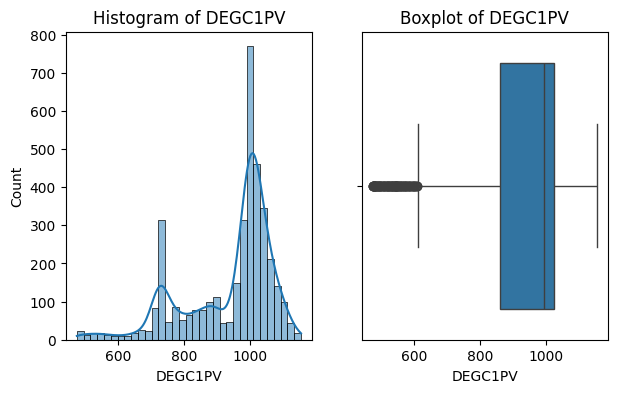

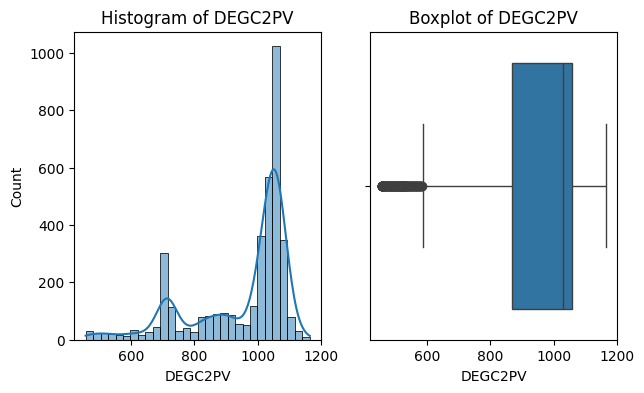

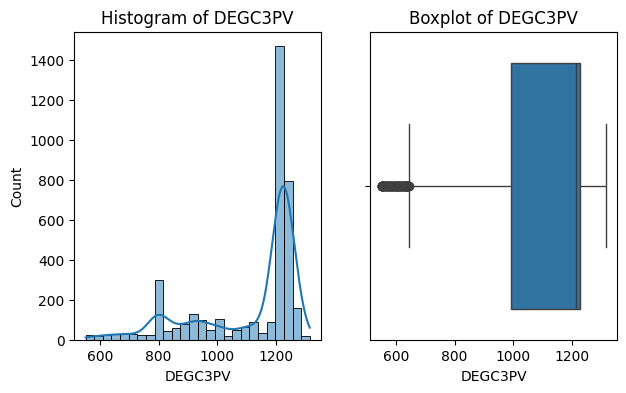

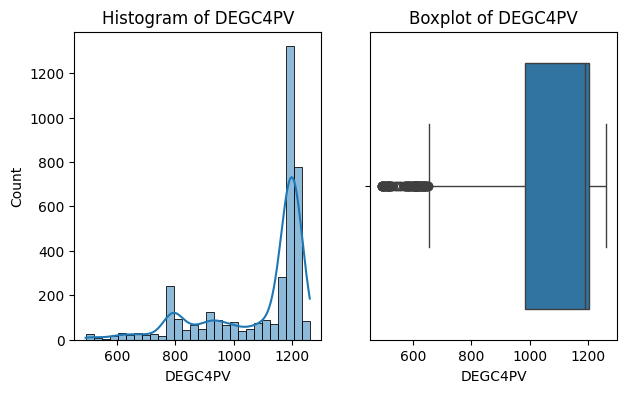

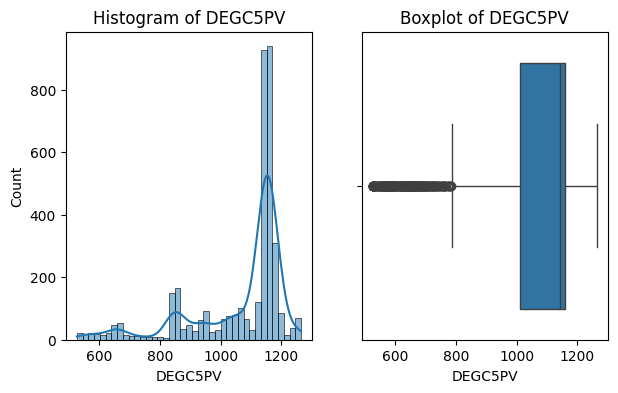

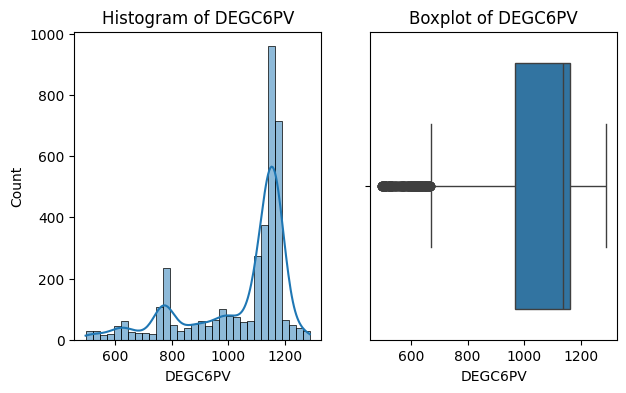

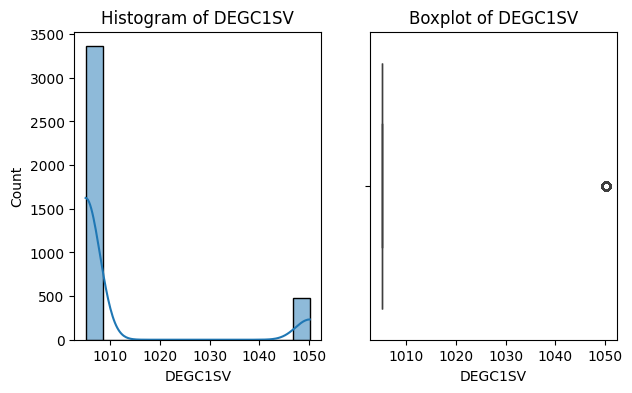

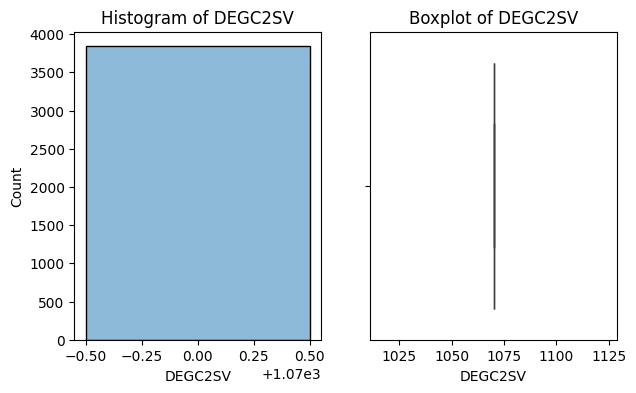

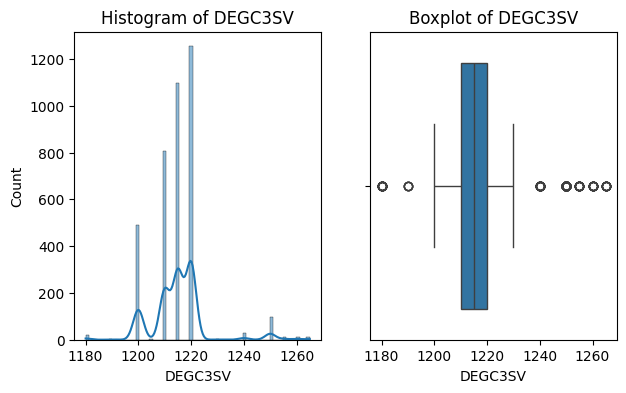

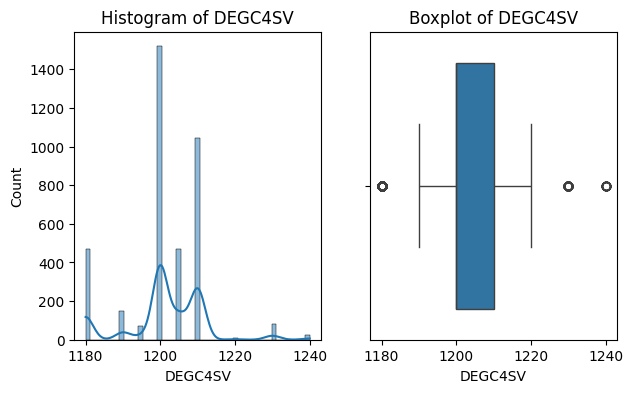

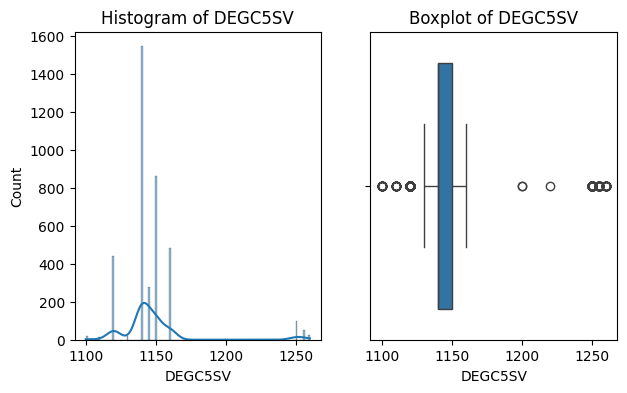

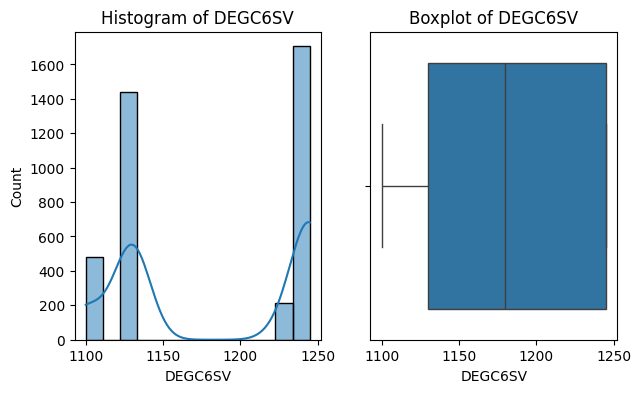

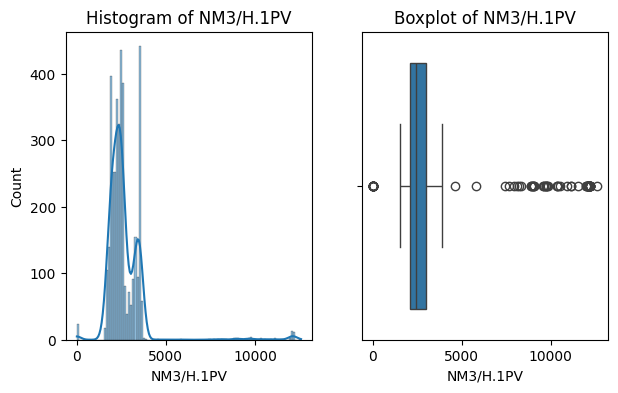

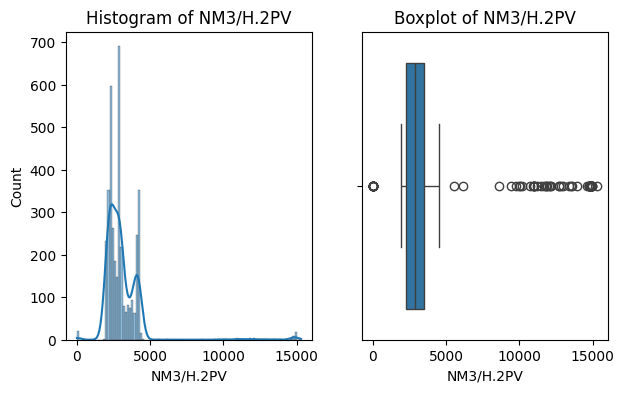

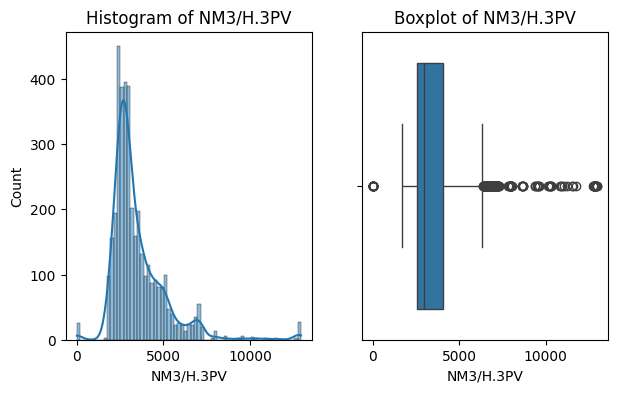

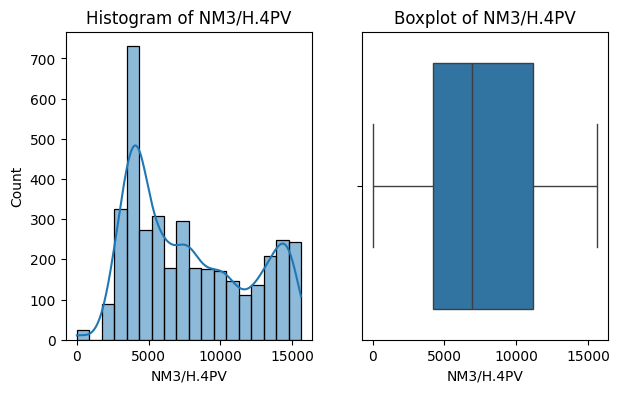

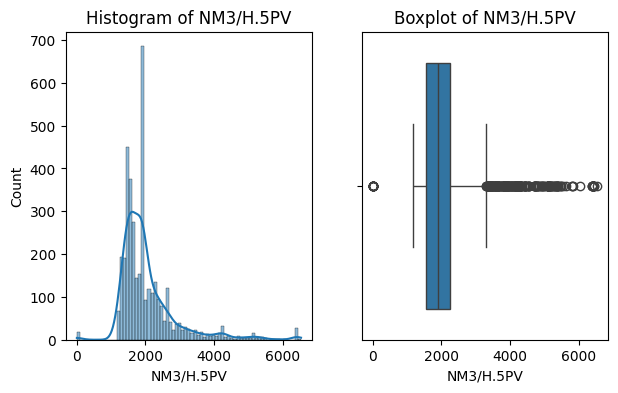

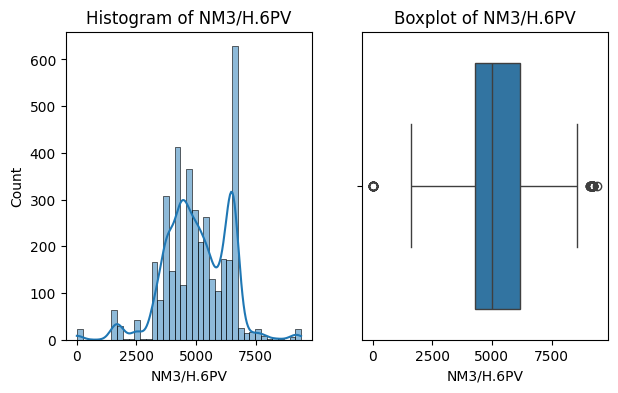

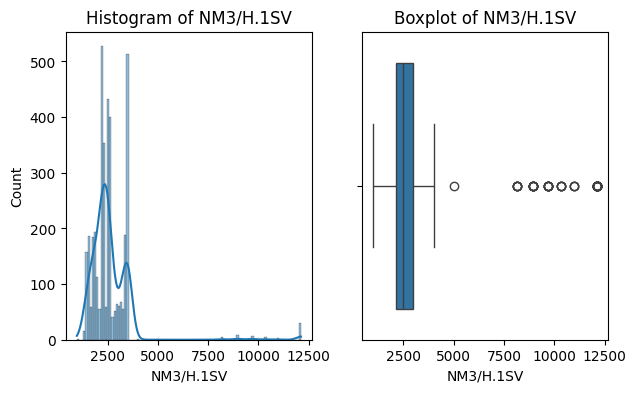

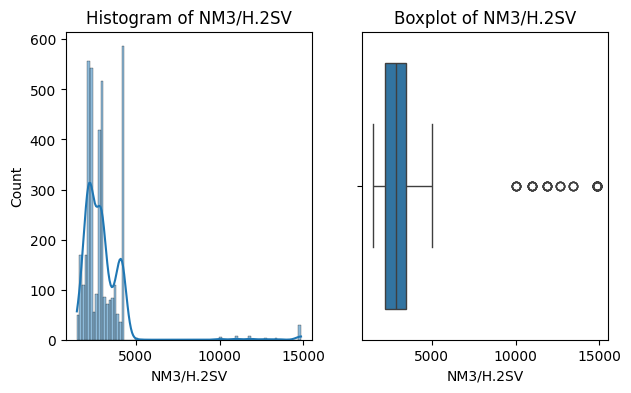

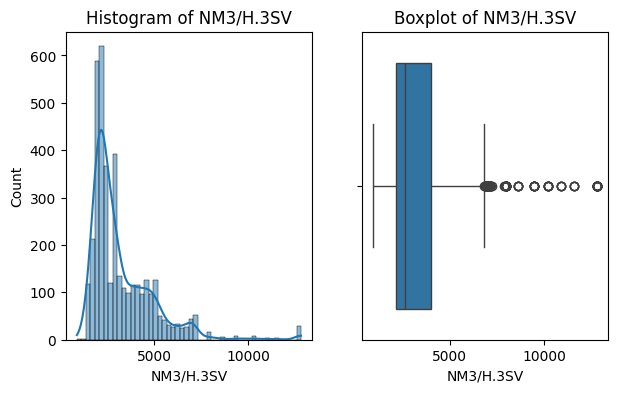

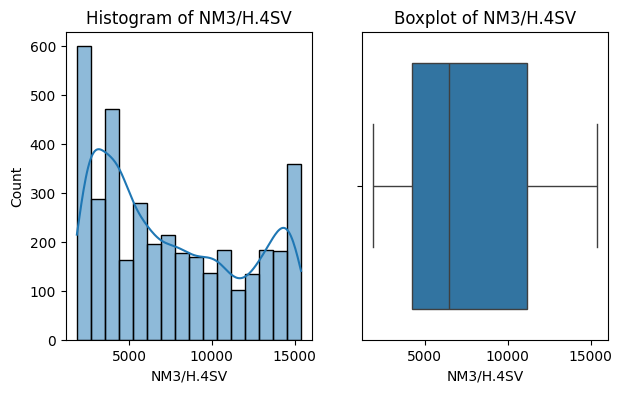

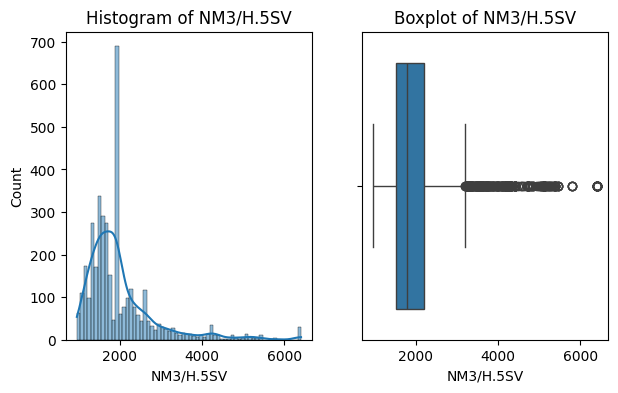

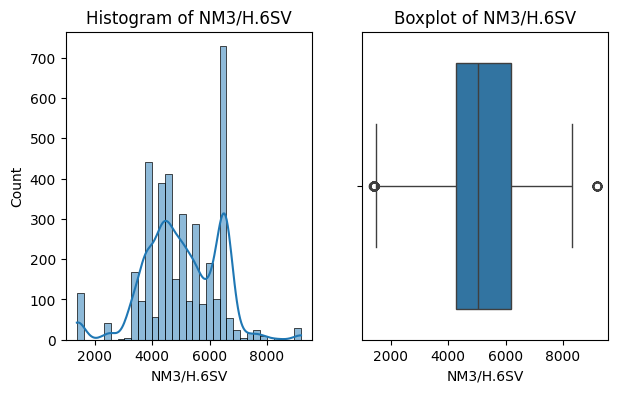

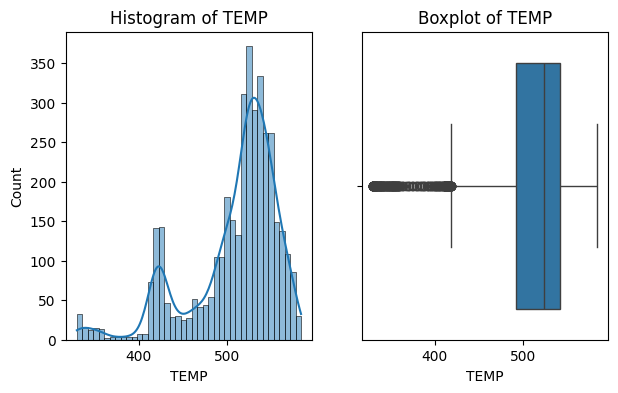

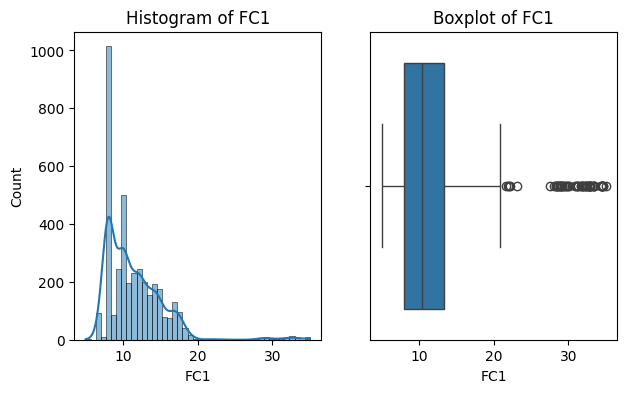

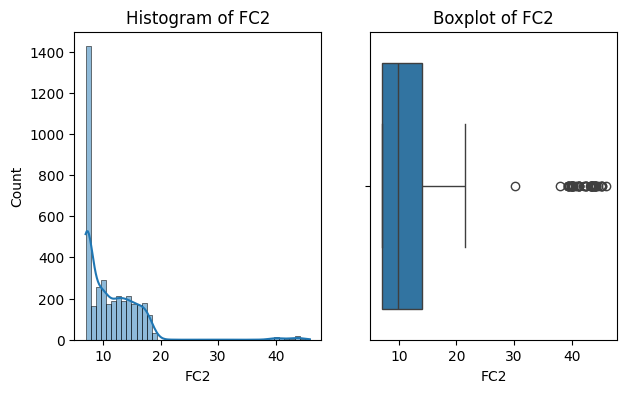

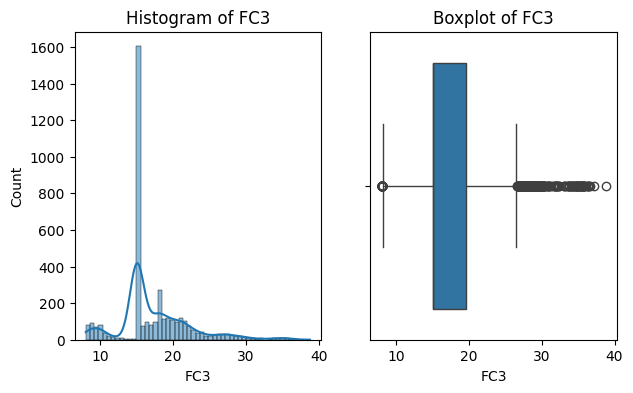

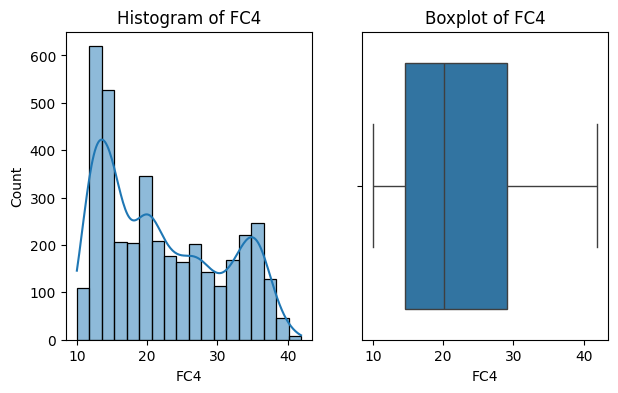

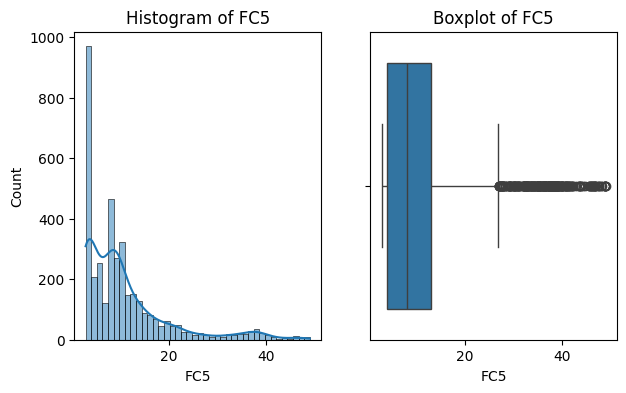

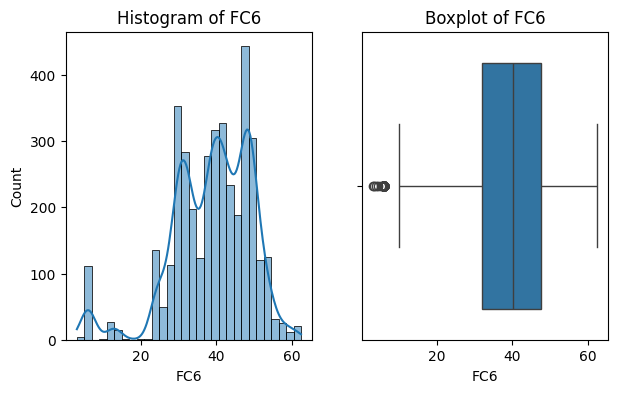

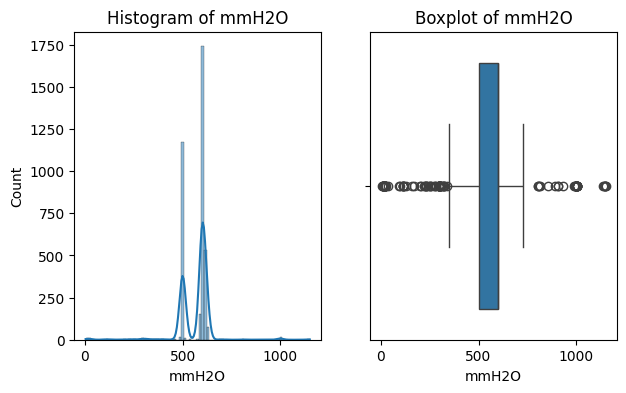

In [ ]:
# univariate analysis

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(7, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

In [ ]:
# skewness and kurtosis

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print('-' * 30)

Column: DEGC1PV
Skewness: -1.1634246272127586
Kurtosis: 0.6478416348523837
------------------------------
Column: DEGC2PV
Skewness: -1.2775292522001533
Kurtosis: 0.5690686639897775
------------------------------
Column: DEGC3PV
Skewness: -1.2656214232170193
Kurtosis: 0.28202853899211533
------------------------------
Column: DEGC4PV
Skewness: -1.3579061090910907
Kurtosis: 0.6971809209060589
------------------------------
Column: DEGC5PV
Skewness: -1.56845677579042
Kurtosis: 1.6271496896629634
------------------------------
Column: DEGC6PV
Skewness: -1.3033009566950609
Kurtosis: 0.5481116598709912
------------------------------
Column: DEGC1SV
Skewness: 2.268673134675013
Kurtosis: 3.1485173736793897
------------------------------
Column: DEGC2SV
Skewness: 0.0
Kurtosis: 0.0
------------------------------
Column: DEGC3SV
Skewness: 1.328445693611833
Kurtosis: 5.825370633058839
------------------------------
Column: DEGC4SV
Skewness: -0.14962284181204377
Kurtosis: 1.5011989260074072
-------

In [ ]:
# identify and remove outliers

def remove_outliers_iqr(df):
    df_clean = df.copy()
    numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[(df_clean[col] >= (Q1 - 1.5 * IQR)) & (df_clean[col] <= (Q3 + 1.5 * IQR))]
    return df_clean

df = remove_outliers_iqr(df)
df.head()

,DEGC1PV,DEGC2PV,DEGC3PV,DEGC4PV,DEGC5PV,DEGC6PV,DEGC1SV,DEGC2SV,DEGC3SV,DEGC4SV,...,NM3/H.5SV,NM3/H.6SV,TEMP,FC1,FC2,FC3,FC4,FC5,FC6,mmH2O
1,1019.2,1009.0,1215.5,1190.7,1133.6,1156.2,1005.0,1070,1210,1200,...,2299,6548,505.2,13.7,15.8,20.3,35.2,13.2,48.2,618
3,980.1,1032.2,1215.5,1189.0,1136.4,1161.0,1005.0,1070,1220,1210,...,2164,6465,529.1,15.7,14.9,18.0,36.4,12.7,49.0,605
5,988.8,1050.7,1221.0,1206.7,1142.5,1166.5,1005.0,1070,1220,1210,...,1677,6548,544.5,17.1,17.4,18.9,35.8,7.5,49.9,597
6,1009.0,1031.4,1220.2,1210.5,1150.2,1122.3,1005.0,1070,1215,1205,...,1916,4911,557.7,11.9,10.3,17.9,23.7,10.9,40.6,599
7,1025.7,1015.5,1223.9,1207.6,1157.3,1152.3,1005.0,1070,1210,1200,...,1472,4542,513.7,9.4,8.4,15.0,18.1,3.0,32.8,622


In [ ]:
36
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error

def evaluate_model(y_test, y_pred):
    # Compute R² score and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f"R² Score: {r2}")
    print(f"Mean Absolute Error: {mae}")

    # Calculate residuals
    residuals = y_test - y_pred

    # Scatter plot between y_test and y_pred
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal reference line
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    # Residual plot
    plt.figure(figsize=(6, 4))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Distribution plot of residuals
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, color='blue', bins=20)
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
scaler = StandardScaler()



# Define features and target variable
X = df.drop(['mmH2O'],axis=1)
y = df['mmH2O']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
linear_mae = mean_absolute_error(y_test, y_pred)
print(f'MAError: {linear_mae}')


MAError: 1.9500437707550564


R² Score: 0.9249410892278833
Mean Absolute Error: 1.9500437707550564


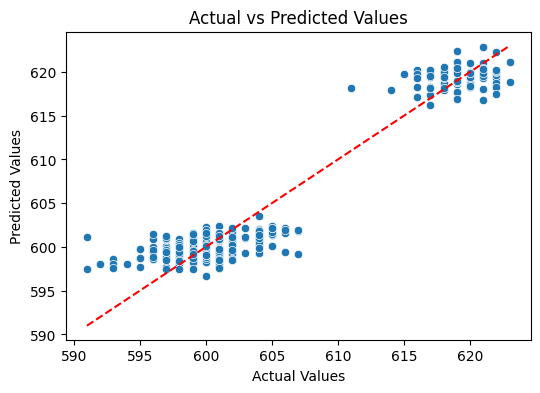

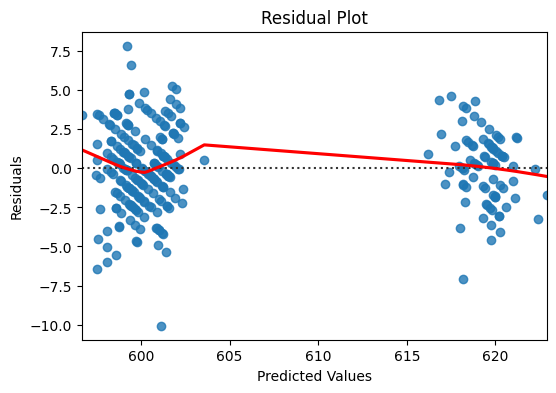

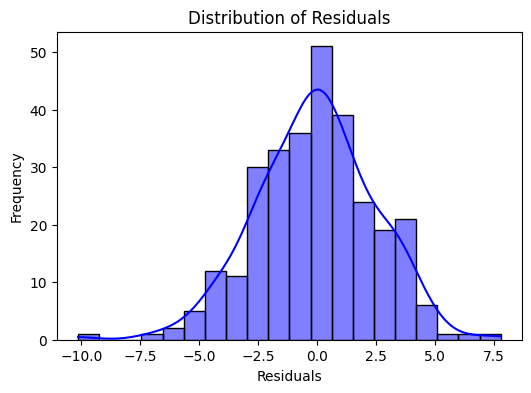

In [ ]:
evaluate_model(y_test, y_pred)

In [ ]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, y_pred)
print(f'Ridge Regression MAError: {ridge_mae}')

Ridge Regression MAError: 1.9489367361202192


R² Score: 0.9249884805762847
Mean Absolute Error: 1.9489367361202192


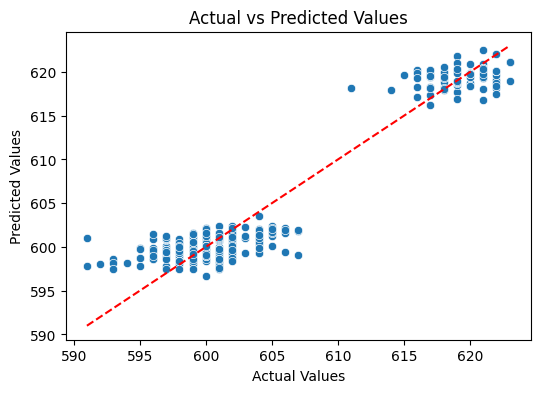

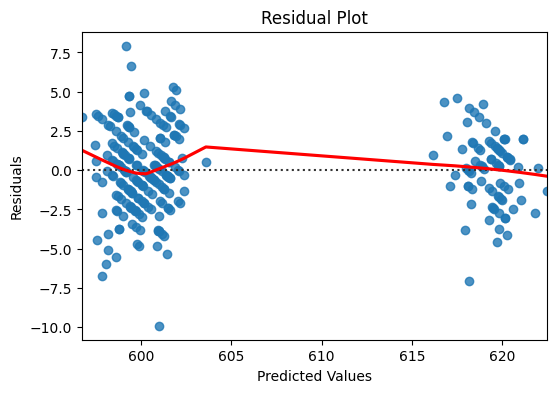

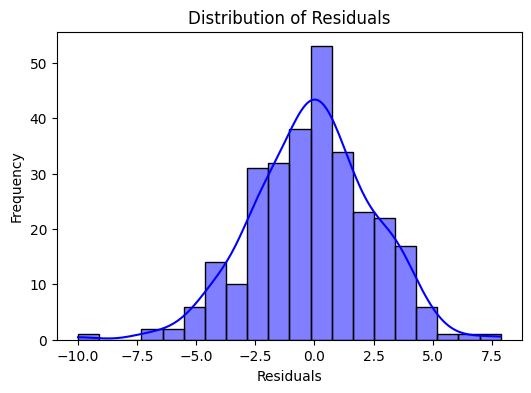

In [ ]:
evaluate_model(y_test, y_pred)

In [ ]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
model = Lasso(alpha=0.1)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
lasso_mae = mean_absolute_error(y_test, y_pred)
print(f'Lasso Regression MAError: {lasso_mae}')

Lasso Regression MAError: 2.0343279902704587


R² Score: 0.918334553178433
Mean Absolute Error: 2.0343279902704587


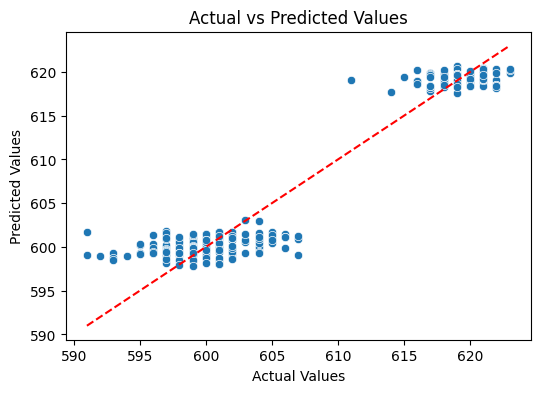

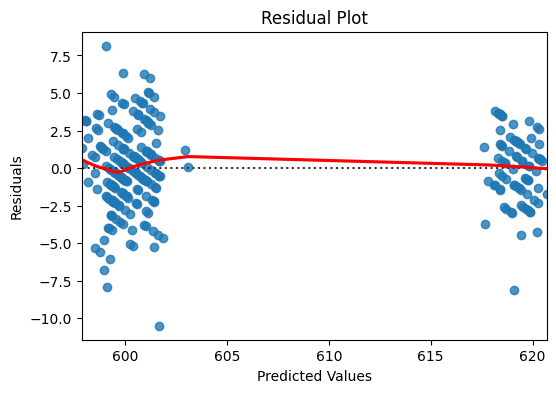

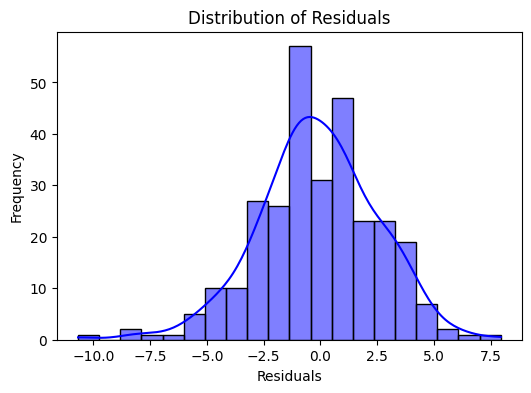

In [ ]:
evaluate_model(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Initialize Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Random Forest Regressor Mean abs Error: {rf_mae}')

Random Forest Regressor Mean abs Error: 1.8052040816326553


R² Score: 0.9349574227008716
Mean Absolute Error: 1.8052040816326553


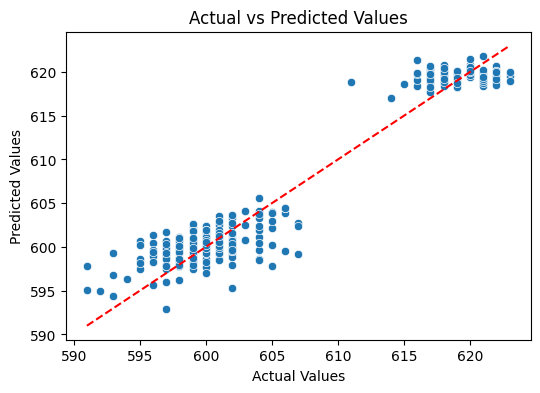

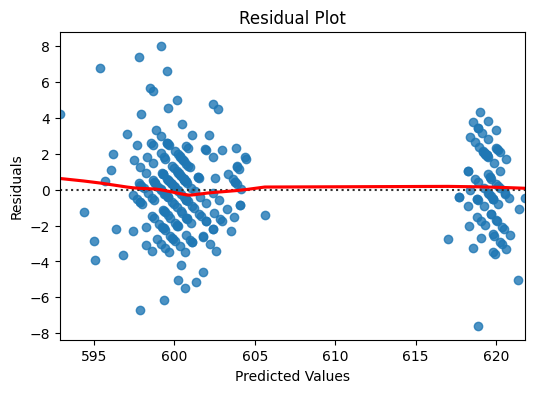

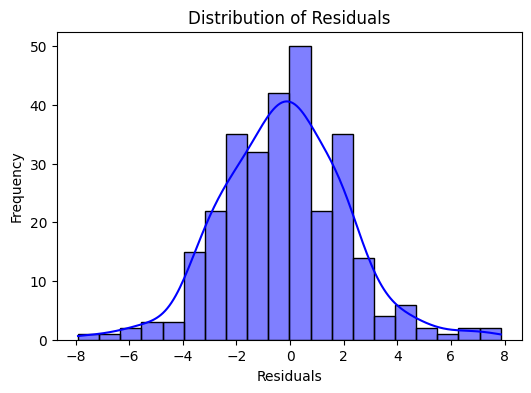

In [ ]:
evaluate_model(y_test, y_pred)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
gbr_mae = mean_absolute_error(y_test, y_pred)
print(f'Gradient Boosting Regressor MAError: {gbr_mae}')


Gradient Boosting Regressor MAError: 1.8632118305754364


R² Score: 0.9340220235954775
Mean Absolute Error: 1.8632118305754364


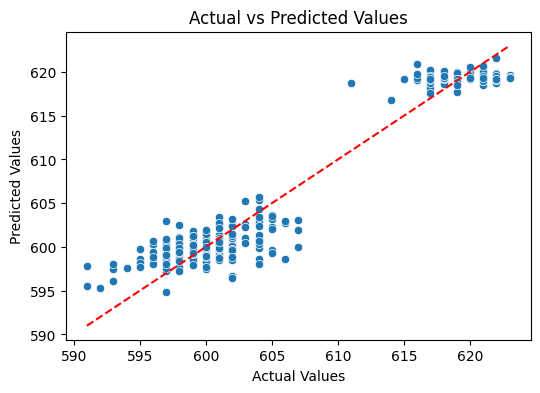

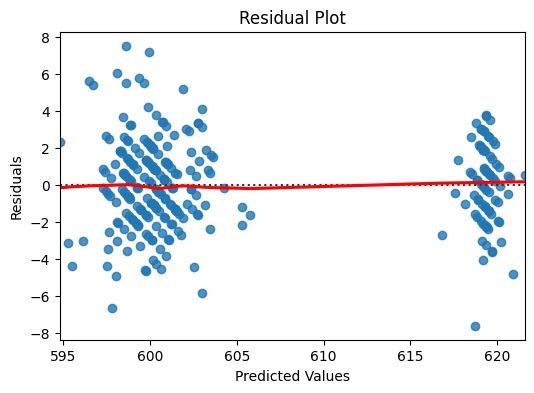

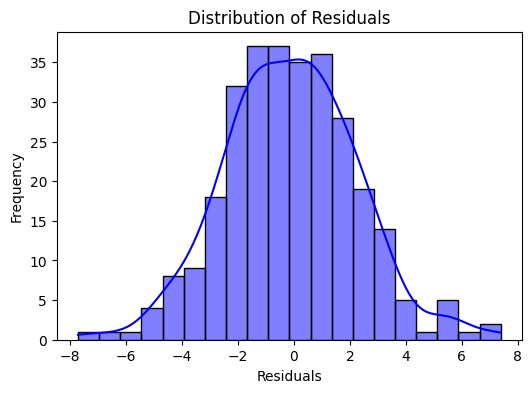

In [ ]:
evaluate_model(y_test, y_pred)

In [ ]:
from sklearn.svm import SVR

# Initialize SVR model
model = SVR(kernel='rbf', C=100, gamma=0.1)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
svr_mae = mean_absolute_error(y_test, y_pred)
print(f'Support Vector Regressor MAE: {svr_mae}')

Support Vector Regressor MAE: 2.2581099505276363


R² Score: 0.904292535963375
Mean Absolute Error: 2.2581099505276363


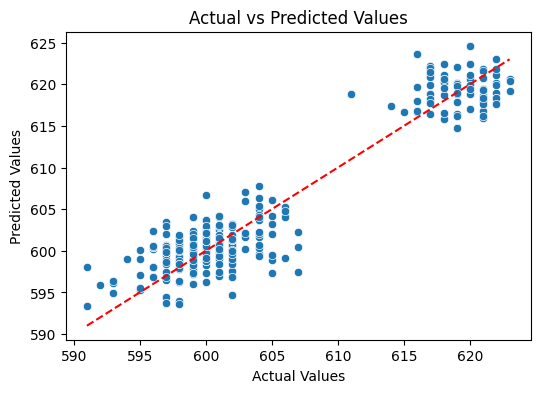

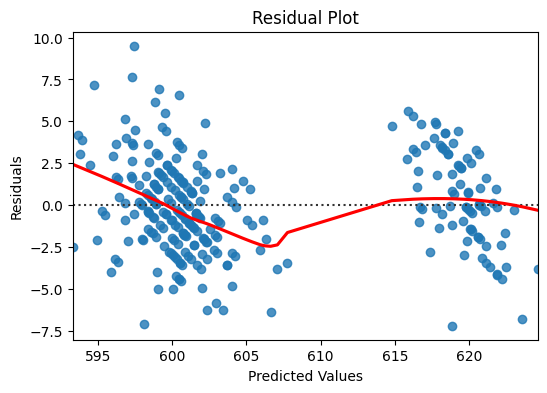

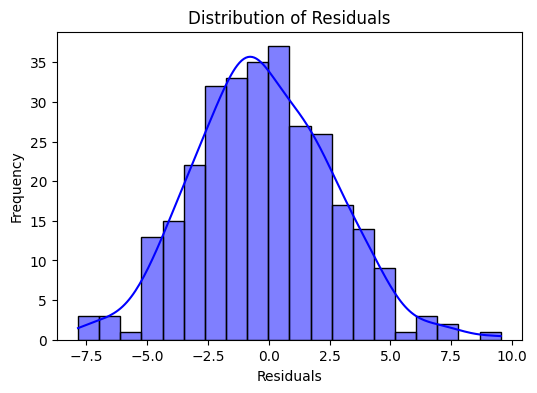

In [ ]:
evaluate_model(y_test, y_pred)

In [ ]:
from sklearn.neural_network import MLPRegressor

# Initialize MLP Regressor model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mlp_mae = mean_absolute_error(y_test, y_pred)
print(f'Neural Network Regressor MAE: {mlp_mae}')

Neural Network Regressor MAE: 4.487532196052043


R² Score: 0.4676671117762733
Mean Absolute Error: 4.487532196052043


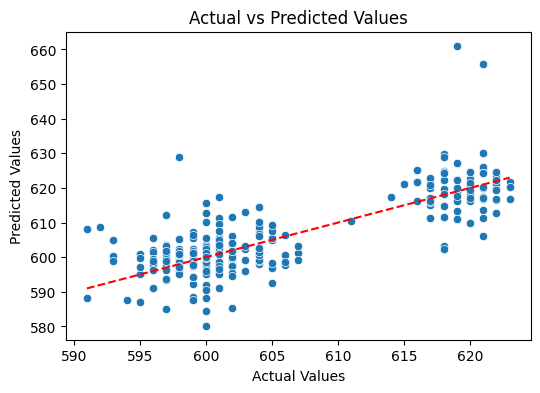

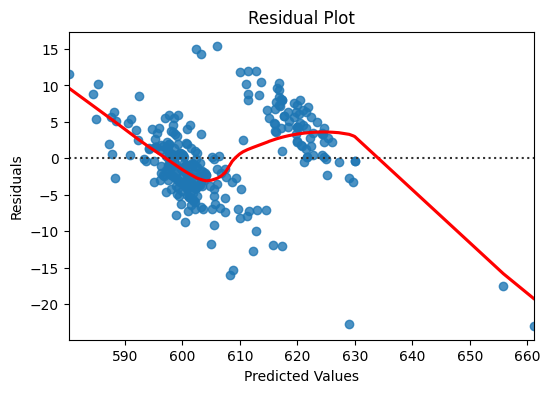

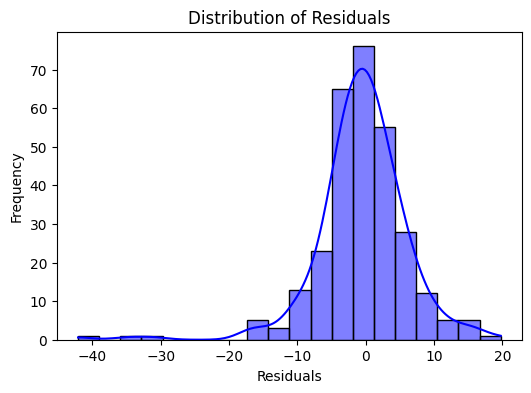

In [ ]:
evaluate_model(y_test, y_pred)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

# Initialize Extra Trees Regressor model
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
etr_mae = mean_absolute_error(y_test, y_pred)
print(f'Extra Trees Regressor MAE: {etr_mae}')


Extra Trees Regressor MAE: 1.9085714285714281


R² Score: 0.9287892048658397
Mean Absolute Error: 1.9085714285714281


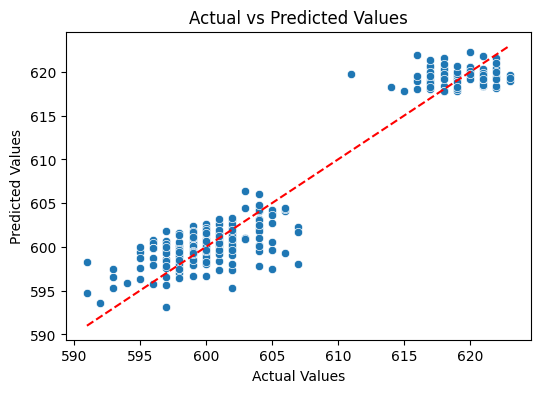

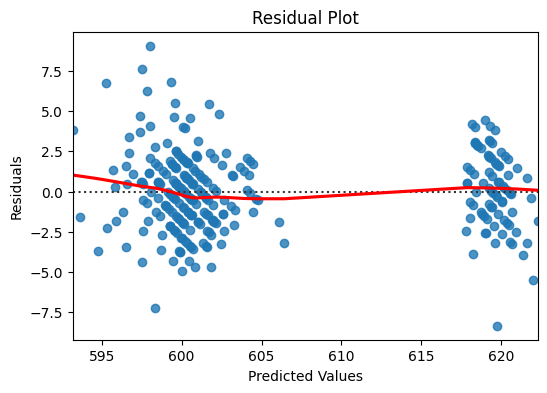

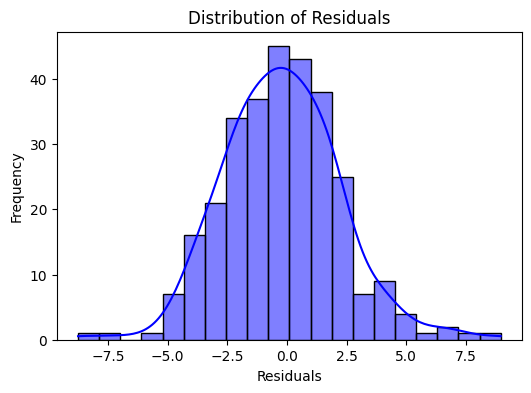

In [ ]:
evaluate_model(y_test, y_pred)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
model = Sequential()

# Add input and hidden layers
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# Add output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history = model.fit(X_train_scaled,
                    y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(X_test_scaled,y_test),
                    verbose=2)


Epoch 1/200
37/37 - 2s - 64ms/step - loss: 602.1193 - val_loss: 592.6229
Epoch 2/200
37/37 - 0s - 3ms/step - loss: 544.4092 - val_loss: 417.4912
Epoch 3/200
37/37 - 0s - 3ms/step - loss: 263.9507 - val_loss: 192.1582
Epoch 4/200
37/37 - 0s - 3ms/step - loss: 176.3549 - val_loss: 149.2319
Epoch 5/200
37/37 - 0s - 3ms/step - loss: 126.7800 - val_loss: 106.9622
Epoch 6/200
37/37 - 0s - 4ms/step - loss: 88.4296 - val_loss: 77.6586
Epoch 7/200
37/37 - 0s - 4ms/step - loss: 66.1962 - val_loss: 60.1832
Epoch 8/200
37/37 - 0s - 3ms/step - loss: 53.5570 - val_loss: 50.6550
Epoch 9/200
37/37 - 0s - 3ms/step - loss: 47.9847 - val_loss: 44.3603
Epoch 10/200
37/37 - 0s - 4ms/step - loss: 41.8722 - val_loss: 39.3569
Epoch 11/200
37/37 - 0s - 3ms/step - loss: 38.5724 - val_loss: 38.0807
Epoch 12/200
37/37 - 0s - 4ms/step - loss: 35.4296 - val_loss: 34.8901
Epoch 13/200
37/37 - 0s - 4ms/step - loss: 32.2039 - val_loss: 30.0727
Epoch 14/200
37/37 - 0s - 3ms/step - loss: 28.9321 - val_loss: 28.0743
Epoc

In [ ]:
y_pred = model.predict(X_test_scaled)

nn_mae = mean_absolute_error(y_test,y_pred)
nn_mae

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


4.481985286790497

R² Score: 0.44911776188276964
Mean Absolute Error: 4.481985286790497


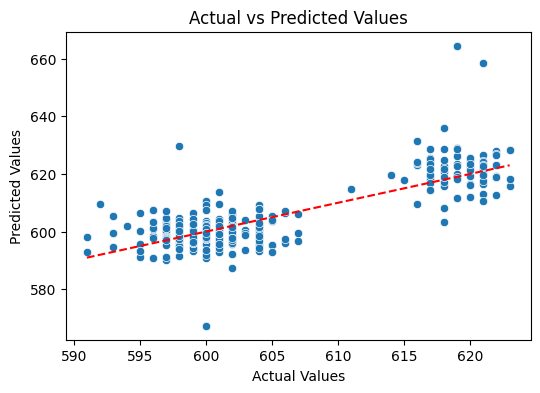

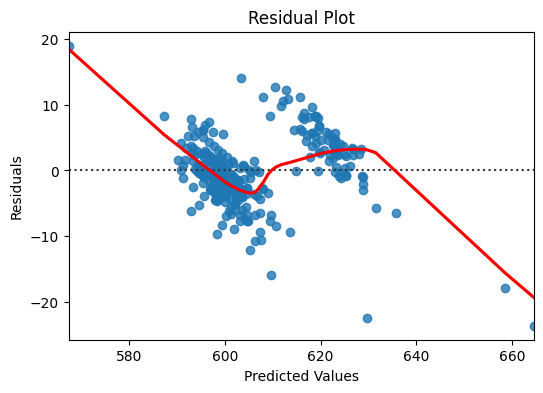

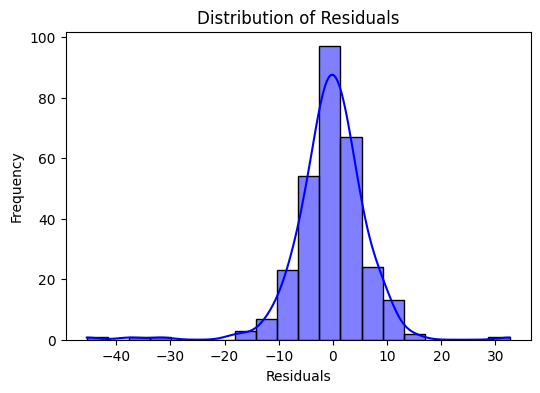

In [ ]:
evaluate_model(y_test, y_pred.reshape(-1))

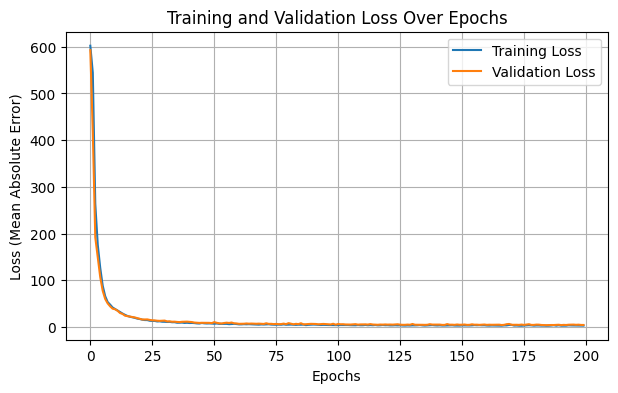

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(7, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Absolute Error)')
plt.legend()
plt.grid(True)
plt.show()


##Random Forest Regressor performs the best out of all the trained models.


R² Score: 0.931609243885459
Mean Absolute Error: 1.8052040816326553


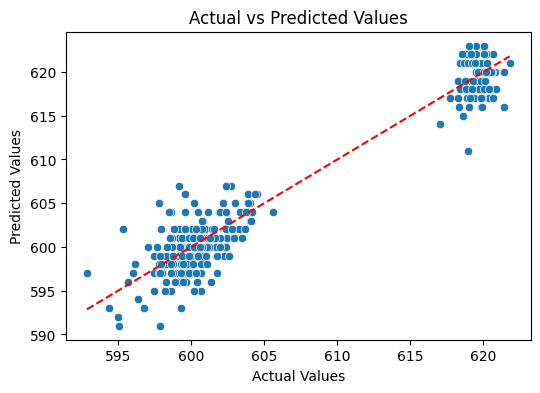

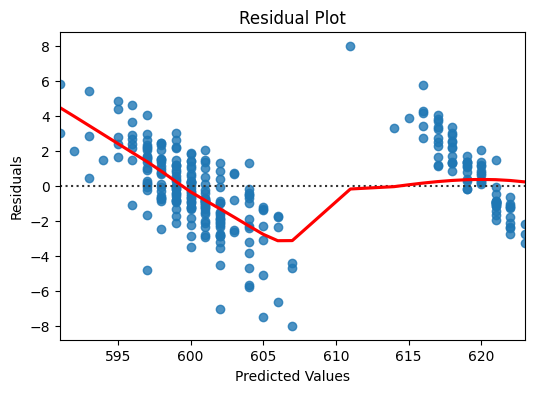

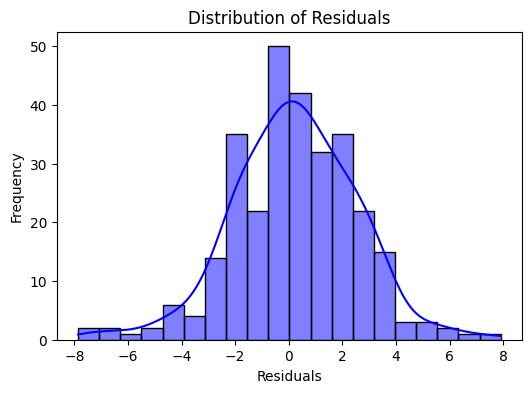

In [ ]:
model = RandomForestRegressor(n_estimators = 100,random_state=42)

model.fit(X_train_scaled,y_train)


y_pred = model.predict(X_test_scaled)

evaluate_model(y_pred,y_test)

In [ ]:
importances = model.feature_importances_

# Create a DataFrame to display the feature importances
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
11,DEGC6SV,0.909382
24,TEMP,0.017357
16,NM3/H.5PV,0.008002
17,NM3/H.6PV,0.006676
12,NM3/H.1PV,0.005788
2,DEGC3PV,0.004607
13,NM3/H.2PV,0.004480
1,DEGC2PV,0.003736
4,DEGC5PV,0.003456
26,FC2,0.003182


In [ ]:
df.corr().drop('mmH2O')[['mmH2O']].sort_values(by='mmH2O',ascending=False)

,mmH2O
DEGC5PV,0.220450
DEGC5SV,0.136272
DEGC6PV,0.086623
DEGC1PV,0.031271
NM3/H.4SV,0.013841
NM3/H.4PV,0.012540
NM3/H.2PV,-0.000577
NM3/H.2SV,-0.009072
FC4,-0.048050
DEGC3PV,-0.049471


In [ ]:
filtered_df = df.corr().drop('mmH2O')[['mmH2O']].dropna()
threshold = 0.2

selected_features = filtered_df[filtered_df['mmH2O'].abs() >= threshold]

print("Selected features based on correlation threshold:")
print(selected_features)

Selected features based on correlation threshold:
              mmH2O
DEGC2PV   -0.451070
DEGC4PV   -0.285962
DEGC5PV    0.220450
DEGC3SV   -0.563923
DEGC4SV   -0.765482
DEGC6SV   -0.953454
NM3/H.3PV -0.212206
NM3/H.5PV -0.292610
NM3/H.3SV -0.265678
NM3/H.5SV -0.322860
TEMP      -0.609276
FC1       -0.288319
FC2       -0.201444
FC5       -0.382699
FC6       -0.352563


In [ ]:
imp_cols = selected_features.index.to_list()
imp_cols

['DEGC2PV',
 'DEGC4PV',
 'DEGC5PV',
 'DEGC3SV',
 'DEGC4SV',
 'DEGC6SV',
 'NM3/H.3PV',
 'NM3/H.5PV',
 'NM3/H.3SV',
 'NM3/H.5SV',
 'TEMP',
 'FC1',
 'FC2',
 'FC5',
 'FC6']

#Feature Selection

In [ ]:
X = df[imp_cols]
y = df['mmH2O']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

R² Score: 0.9272095032246443
Mean Absolute Error: 1.8718707482993164


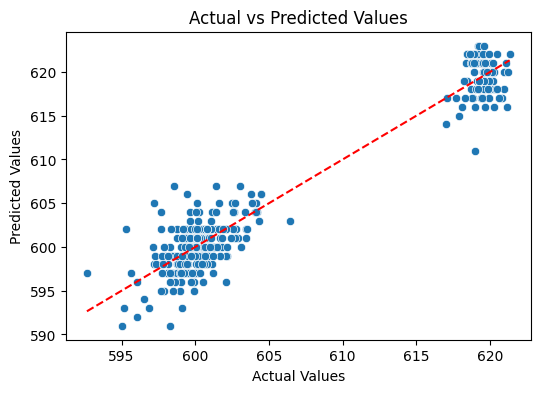

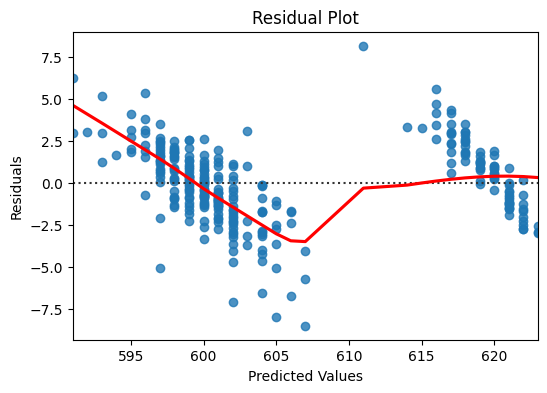

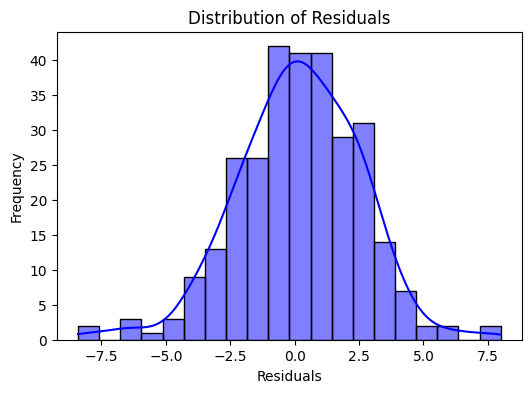

In [ ]:
model = RandomForestRegressor(n_estimators = 100,random_state=42)

model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

evaluate_model(y_pred,y_test)

In [ ]:
imp_cols

['DEGC2PV',
 'DEGC4PV',
 'DEGC5PV',
 'DEGC3SV',
 'DEGC4SV',
 'DEGC6SV',
 'NM3/H.3PV',
 'NM3/H.5PV',
 'NM3/H.3SV',
 'NM3/H.5SV',
 'TEMP',
 'FC1',
 'FC2',
 'FC5',
 'FC6']

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


KeyboardInterrupt: 

In [ ]:
# Retrieve the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

evaluate_model(y_pred,y_test)

In [ ]:
from joblib import dump
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
y

,mmH2O
1,618
3,605
5,597
6,599
7,622
...,...
852,596
853,599
855,599
861,600


In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
import joblib
joblib.__version__

'1.4.2'

In [ ]:
X[imp_cols].loc[5].to_list()

[1050.7,
 1206.7,
 1142.5,
 1220.0,
 1210.0,
 1245.0,
 4459.0,
 1677.0,
 4345.0,
 1677.0,
 544.5,
 17.1,
 17.4,
 7.5,
 49.9]

In [ ]:
y.loc[5]

597

In [ ]:
from joblib import load

# Load the scaler from the file
scaler = load('/content/scaler.joblib')

# Transform new sample data
X_new_scaled = scaler.transform([[1009.0,
 1190.7,
 1133.6,
 1210.0,
 1200.0,
 1130.0,
 4861.0,
 2298.0,
 4759.0,
 2299.0,
 505.2,
 13.7,
 15.8,
 13.2,
 48.2]])


In [ ]:
from joblib import dump
from sklearn.ensemble import RandomForestRegressor

# Save the model to a file
dump(model, 'model.joblib')


['model.joblib']

In [ ]:
from joblib import load

# Load the model from the file
model = load('/content/model.joblib')

# Make predictions on the new scaled data
y_pred = model.predict(X_new_scaled)
y_pred

array([618.66])